# HOPUS

HOPUS (**HO**using **P**ricing **U**tilitie**S**) contains a variety of routines used to predict real estate prices.

This notebook highlights what HOPUS can do, namely
- clean the raw data,
- perform exploratory analysis of the data,
- train a variety of models for the prediction of real estate prices, and
- evaluate the performance of these models.

This notebook proceeds as follows.
1. We discuss how to sidestep the difficult question of how to predict how real estate prices evolve over time. Essentially we reduce all that complexity to traking a single home price index over time.

## 0. Technical preliminaries

In [27]:
# Standard imports
import pandas as pd

In [1]:
# We clone the HOPUS repository to have access to all its data and routines
!git clone https://github.com/aremondtiedrez/hopus.git
%cd hopus

Cloning into 'hopus'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 106 (delta 42), reused 82 (delta 24), pack-reused 0 (from 0)
Receiving objects: 100% (106/106), 633.54 KiB | 6.15 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/hopus


In [2]:
# Import requisite modules from HOPUS
import preprocessing

## 1. Problem: Real estate prices vary over time

Predicting how real estate prices vary over time is a valuable and complicated endeavour that requires accounting for the evolution of macro-economic phenomena such as mortgage rates, housing supply, public policy, and good ole' demographics.

HOPUS is *not* built to do that. Instead, the focus of HOPUS is on predicting the sale price of a home given the *characteristics* of that home. Nonetheless, home prices in the U.S. grown at a rate of about 5\% a year for the past 30 years, so clearly accounting for *when* a home is bought or sold is crucial in estimating its price accurately.

Thankfully, Standard & Poor's publishes, every month, an index tracking the price of single-family homes in the U.S. We will use this index to, admittedly coarsely, account for the temporal variation in home prices.

In [4]:
# Load the home price index as a pandas DataFrame
hpi = preprocessing.home_price_index.load()

In [5]:
# Inspect the raw home price index
hpi

,observation_date,CSUSHPINSA
0,1987-01-01,63.732
1,1987-02-01,64.131
2,1987-03-01,64.467
3,1987-04-01,64.972
4,1987-05-01,65.546
...,...,...
461,2025-06-01,331.627
462,2025-07-01,330.986
463,2025-08-01,329.885
464,2025-09-01,328.978


In [6]:
# Preprocess the home price index
preprocessing.home_price_index.preprocess(hpi)

In [7]:
# Inspect the processed home price index
hpi

,trueValue,availableValue,trueMinusAvailable,monthAvgTrueMinusAvailable,predictedValue
date,,,,,
1987-04,64.972,63.732,1.240,3.224667,66.956667
1987-05,65.546,64.131,1.415,4.277949,68.408949
1987-06,66.217,64.467,1.750,4.207205,68.674205
1987-07,66.785,64.972,1.813,3.422769,68.394769
1987-08,67.268,65.546,1.722,2.295385,67.841385
...,...,...,...,...,...
2025-06,331.627,327.747,3.880,4.207205,331.954205
2025-07,330.986,329.915,1.071,3.422769,333.337769
2025-08,329.885,331.439,-1.554,2.295385,333.734385


<Axes: xlabel='date'>

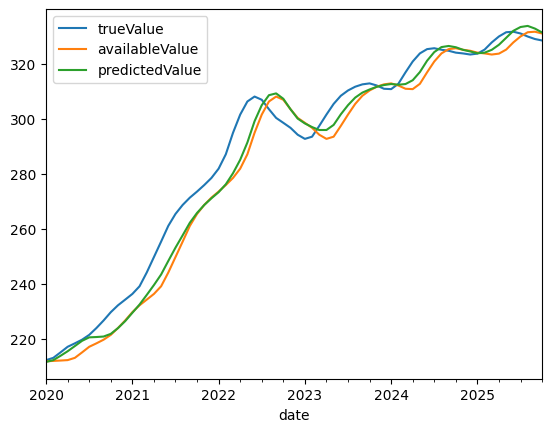

In [28]:
# Plot the evolution of the true, available, and predicted
# home price indices over the recent past
hpi.loc[
    hpi.index >= pd.Period("2020-01", freq="M"),
    ["trueValue", "availableValue", "predictedValue"]
].plot()
# Note: the home price index is normalized so that
# it is equal to 100 in January 2000.